# Introduction / Background

**Introduction:**

Open Food Facts is a non-profit collaborative project that aims to create a comprehensive, open-source database of food products from around the world. The project is managed by a non-profit organization with over a hundred thousand active contributors. The fact that the database is open source means that anyone can volunteer and contribute. Currently, the database contains entries of over 3 million food products from 150 countries with information pertaining to the ingredients, allergens, and nutrition facts found on product labels. The data is collected from a variety of sources, including barcode scans, product labels, and volunteer contributions.


**Background on the dataset:**

The Open Food Facts database was created out of frustration with the lack of transparency in the food industry. Because food manufacturers often use proprietary ingredients and complex labeling, many consumers are ill-informed when it comes to knowing what is in their food. Thus, the Open Food Facts project aims to provide transparency to consumers with easy to access product information that is accurate and up-to-date. 🙂


**Project Objective:**

Using the Open Food Facts database, we want to achieve the following objectives in this project:

1.  Predict the UK Nutrition score categories of food products by using Linear regression and Logistic Regression models
2.   Group different food products based on their ingredients by using Decision Tree



Before starting the analysis, we import the necessary packages as follows:

Loading Dependencies

In [1]:
!pip install torchinfo
!pip install dtreeviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 2.2 MB/s eta 0:00:00


In [2]:
# import packages

# to mount google drive
from google.colab import drive

# For data analysis
import pandas as pd
import numpy as np

# For data visualization
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

# sklearn libraries
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

import matplotlib.pyplot as plt

# resampling package
from imblearn.over_sampling import RandomOverSampler



In [3]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchinfo import summary
from torch.utils.data import random_split

# Setting the device to do computations on - GPU's are generally faster!
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(torch.__version__)
print(device)

2.1.0+cu118
cpu


Mount Google Drive, import data and read data into a Panda DataFrame

In [4]:
# drive.flush_and_unmount()
drive.mount('/content/drive')
#df = pd.read_table('/content/drive/MyDrive/en.openfoodfacts.org.products.tsv')
df = pd.read_table('/content/drive/MyDrive/5450/en.openfoodfacts.org.products.tsv')
# df = pd.read_table('/content/drive/MyDrive/kaggle/en.openfoodfacts.org.products.tsv')


Mounted at /content/drive


<ipython-input-4-f42631beae98>:4: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_table('/content/drive/MyDrive/5450/en.openfoodfacts.org.products.tsv')


# Exploratory Data Analysis

The Open Food Facts dataset is quite large with a size of about 1 GB (~360000 entries!). So, it would make sense to first conduct EDA to understand what we are working with. To have an idea, let us take a look at the first 10 rows of our dataframe df.


In [5]:
# Peek first 10 rows of the data set
df.head(10)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,4559,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,16087,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,16094,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,16100,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055651,2017-03-09T10:34:11Z,1489055651,2017-03-09T10:34:11Z,Breadshop Honey Gone Nuts Granola,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,16117,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055730,2017-03-09T10:35:30Z,1489055730,2017-03-09T10:35:30Z,Organic Long Grain White Rice,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,16124,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055711,2017-03-09T10:35:11Z,1489055712,2017-03-09T10:35:12Z,Organic Muesli,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.0,7.0,NaN,NaN
8,16193,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055651,2017-03-09T10:34:11Z,1489055651,2017-03-09T10:34:11Z,Organic Dark Chocolate Minis,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,16513,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055654,2017-03-09T10:34:14Z,1489055654,2017-03-09T10:34:14Z,Organic Sunflower Oil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## What are the data types?
From our initial observations, we can see that the dataframe contains information on a variety of food products, including soft drinks, teas, and other beverages. The products are from a variety of countries, including the United States, Germany, Spain, the United Kingdom, and France. The dataframe also includes information on the nutrients in each product, such as energy, sugar, and fat per 100 grams. Likewise, there are columns that list the ingredients and allergens (if applicable) for each product. On the other hand, there are plenty of columns that the Open Food Facts website uses as part of their backend code such as when a product entry was created ("created_datetime") or when it was last modified ("last_modified_datetime"). These columns are not particularly useful to us. However, columns like ("product_name") and ("ingredients_text") will definitely be of interest.

Next, we shall take a look at what sort of data types we are dealing with in the columns of this dataframe.

In [6]:
# Check data types of columns and the shape of dataframe
df.dtypes

code                        object
url                         object
creator                     object
created_t                   object
created_datetime            object
                            ...   
carbon-footprint_100g      float64
nutrition-score-fr_100g    float64
nutrition-score-uk_100g    float64
glycemic-index_100g        float64
water-hardness_100g        float64
Length: 163, dtype: object

## What is the shape?
We can observe that the data types are quite diverse, consisting of objects and float64. Since a majority of the columns contain object values, this indicates that the dataset incorporates a variety of data formats, including strings (product name, categorie, country), numerical data (nutrients per 100 grams), and even comma-separated values (ingredients).

The presence of comma-separated values within the "ingredients_text" column suggests that the nutritional information for each product is some what structured and organized, allowing us the potential to analyze and explore nutritional patterns and trends. As a result, this means we will need to cast the data types appropriately so that it can be parsed.

Now, we will take a look at the shape of this dataframe and the descriptive summary.

In [7]:
# Get the shape of the dataframe
df.shape

(356027, 163)

## A descriptive summary of our dataframe
As alluded to earlier in our introduction, the Open Food Facts dataset is quite large and comprehensive with a shape that is an astonishing 356027 rows and 163 columns! This tells us that the dataset has a significant amount of information on a wide range of food products. The large number of rows implies that the dataset can potentially provide detailed analysis and insights into the various aspects of food products, such as their origins, pricing, and nutritional composition. Likewise, the large number of columns suggests that the dataset covers a broad range of attributes related to each food product.

Then, we shall take a look at the descriptive summary of this dataframe.

In [8]:
# Get a descriptive summary of the dataframe
df.describe()

,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,energy_100g,energy-from-fat_100g,fat_100g,...,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,0.0,283867.000000,283867.000000,0.0,283867.000000,0.0,0.0,295367.000000,869.000000,2.794970e+05,...,3228.000000,404.000000,182.000000,1383.000000,0.0,278.000000,254856.000000,254856.000000,0.0,0.0
mean,NaN,1.876851,0.023430,NaN,0.059736,NaN,NaN,1125.453320,587.216617,5.606587e+04,...,33.392680,60.360124,15.362637,52.102675,NaN,335.790664,9.166137,8.980656,NaN,NaN
std,NaN,2.501022,0.153094,NaN,0.280660,NaN,NaN,936.825952,713.255708,2.963385e+07,...,32.906834,29.262350,3.692658,19.028361,NaN,423.244817,8.999870,9.151757,NaN,NaN
min,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,8.000000,6.000000,NaN,0.000000,-15.000000,-15.000000,NaN,NaN
25%,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,382.000000,49.400000,1.000000e-01,...,0.000000,45.000000,12.000000,33.000000,NaN,82.650000,1.000000,1.000000,NaN,NaN
50%,NaN,1.000000,0.000000,NaN,0.000000,NaN,NaN,1092.000000,300.000000,5.290000e+00,...,25.000000,58.000000,15.000000,52.000000,NaN,190.950000,10.000000,9.000000,NaN,NaN
75%,NaN,3.000000,0.000000,NaN,0.000000,NaN,NaN,1674.000000,900.000000,2.000000e+01,...,55.000000,93.000000,15.000000,70.000000,NaN,378.700000,16.000000,16.000000,NaN,NaN
max,NaN,30.000000,2.000000,NaN,6.000000,NaN,NaN,231199.000000,3830.000000,1.566667e+10,...,100.000000,100.000000,25.000000,100.000000,NaN,2842.000000,40.000000,40.000000,NaN,NaN


## What columns do we have?
Since there are 163 columns in the dataframe, there is no way we can display them all at once when viewing the dataframe. So, one way is to iterate all the columns in the dataframe and print them out.

In [9]:
# Look through all the available columns in the dataset
for col in df.columns:
  print(col)

code
url
creator
created_t
created_datetime
last_modified_t
last_modified_datetime
product_name
generic_name
quantity
packaging
packaging_tags
brands
brands_tags
categories
categories_tags
categories_en
origins
origins_tags
manufacturing_places
manufacturing_places_tags
labels
labels_tags
labels_en
emb_codes
emb_codes_tags
first_packaging_code_geo
cities
cities_tags
purchase_places
stores
countries
countries_tags
countries_en
ingredients_text
allergens
allergens_en
traces
traces_tags
traces_en
serving_size
no_nutriments
additives_n
additives
additives_tags
additives_en
ingredients_from_palm_oil_n
ingredients_from_palm_oil
ingredients_from_palm_oil_tags
ingredients_that_may_be_from_palm_oil_n
ingredients_that_may_be_from_palm_oil
ingredients_that_may_be_from_palm_oil_tags
nutrition_grade_uk
nutrition_grade_fr
pnns_groups_1
pnns_groups_2
states
states_tags
states_en
main_category
main_category_en
image_url
image_small_url
energy_100g
energy-from-fat_100g
fat_100g
saturated-fat_100g
-buty

## Selecting relevant columns

Selecting relevant columns is a crucial step to ensure that the analysis focuses on the most informative and pertinent data. Given our logistic regression and clustering tasks, we are primarily interested in the ingredients of the food products, as these provide insights into the nutritional properties and potential health implications of the products. Therefore, we are dropping columns that are not useful for the tasks such as data entry and packaging information; only keeping ingredients-related columns.

By focusing on ingredients-related columns, we can effectively streamline the analysis process, reducing computational complexity and improving the efficiency of our models. Moreover, excluding irrelevant columns helps to minimize noise and potential biases that may arise from unrelated data, enhancing the accuracy and reliability of our results.

We will create a new dataframe called new_df by selecting the columns we want. Then, we will cast the columns containing objects to string data type.

In [10]:
# Select relevant columns
new_df = df[['product_name', 'brands','brands_tags', 'countries_en', 'ingredients_text', 'allergens', 'additives_n', 'additives_en', 'energy_100g', 'fat_100g', 'saturated-fat_100g', 'monounsaturated-fat_100g', 'polyunsaturated-fat_100g', 'omega-3-fat_100g', 'omega-6-fat_100g', 'omega-9-fat_100g', 'trans-fat_100g', 'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 'starch_100g', 'polyols_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'fruits-vegetables-nuts_100g', 'nutrition-score-uk_100g']]

In [11]:
# Cast types of columns and confirm change
new_df['product_name'] = new_df['product_name'].astype('string')
new_df['brands'] = new_df['brands'].astype('string')
new_df['brands_tags'] = new_df['brands_tags'].astype('string')
new_df['countries_en'] = new_df['countries_en'].astype('string')
new_df['ingredients_text'] = new_df['ingredients_text'].astype('string')
new_df['allergens'] = new_df['allergens'].astype('string')
new_df['additives_en'] = new_df['additives_en'].astype('string')
new_df = new_df.sort_values(by='additives_n', ascending=False)

<ipython-input-11-7370252c0a0b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['product_name'] = new_df['product_name'].astype('string')
<ipython-input-11-7370252c0a0b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['brands'] = new_df['brands'].astype('string')
<ipython-input-11-7370252c0a0b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

We can now take a quick look at the result of our new dataframe.

In [12]:
# Check the data types for the columns
new_df.dtypes

product_name                    string
brands                          string
brands_tags                     string
countries_en                    string
ingredients_text                string
allergens                       string
additives_n                    float64
additives_en                    string
energy_100g                    float64
fat_100g                       float64
saturated-fat_100g             float64
monounsaturated-fat_100g       float64
polyunsaturated-fat_100g       float64
omega-3-fat_100g               float64
omega-6-fat_100g               float64
omega-9-fat_100g               float64
trans-fat_100g                 float64
cholesterol_100g               float64
carbohydrates_100g             float64
sugars_100g                    float64
starch_100g                    float64
polyols_100g                   float64
fiber_100g                     float64
proteins_100g                  float64
salt_100g                      float64
fruits-vegetables-nuts_10

In [13]:
# Sense check cleaned df
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356027 entries, 158332 to 356025
Data columns (total 27 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   product_name                 338515 non-null  string 
 1   brands                       326977 non-null  string 
 2   brands_tags                  326957 non-null  string 
 3   countries_en                 355752 non-null  string 
 4   ingredients_text             283893 non-null  string 
 5   allergens                    37176 non-null   string 
 6   additives_n                  283867 non-null  float64
 7   additives_en                 170189 non-null  string 
 8   energy_100g                  295367 non-null  float64
 9   fat_100g                     279497 non-null  float64
 10  saturated-fat_100g           263823 non-null  float64
 11  monounsaturated-fat_100g     23040 non-null   float64
 12  polyunsaturated-fat_100g     23075 non-null   float64

At this point, it makes sense to take a look at the first 10 rows of our dataframe new_df to get a sense of how things look. We have not dropped any null values yet, so it is expected that there will be some rows with this problem.

In [14]:
# Print the first 10 rows of new_df
new_df.head(10)

,product_name,brands,brands_tags,countries_en,ingredients_text,allergens,additives_n,additives_en,energy_100g,fat_100g,...,cholesterol_100g,carbohydrates_100g,sugars_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,salt_100g,fruits-vegetables-nuts_100g,nutrition-score-uk_100g
158332,Italian Style Pinwheels,"Taylor Farms, Taylor Farms Illinois Inc","taylor-farms,taylor-farms-illinois-inc",United States,Flour tortilla (enriched bleached wheat flour ...,<NA>,30.0,"E101 - Riboflavin,E101i - Riboflavin,E170 - Ca...",1033.0,11.76,...,0.029,24.71,2.35,NaN,NaN,3.5,10.59,1.76276,NaN,10.0
188269,Confiserie,Sans marque,sans-marque,France,"Sirops de glucose et de glucose-fructose, sucr...","BLÉ, BLÉ, LACTOSE, LAIT, LAIT",30.0,"E100 - Curcumin,E120 - Cochineal,E14XX - Modif...",1702.0,6.90,...,NaN,83.20,83.20,NaN,NaN,NaN,1.80,0.16000,NaN,18.0
188267,Confiserie,sans marque,sans-marque,France,Ingrédients: sirops de glucose et de glucose-f...,"BLE, BLE, LACTOSE, LAIT, LAIT",30.0,"E100 - Curcumin,E120 - Cochineal,E14XX - Modif...",1702.0,6.90,...,NaN,83.20,83.20,NaN,NaN,NaN,1.90,0.16000,NaN,18.0
188268,Confiserie,sans marque,sans-marque,France,Ingrédients: sirops de glucose et de glucose-f...,"BLE, BLE, LACTOSE, LAIT, LAIT",30.0,"E100 - Curcumin,E120 - Cochineal,E14XX - Modif...",1702.0,6.90,...,NaN,83.20,83.20,NaN,NaN,NaN,1.90,0.16000,NaN,18.0
91863,Mackinaw Fudge Cake,Arnie's,arnie-s,United States,"Sugar, enriched wheat flour bleached (flour, n...",<NA>,29.0,"E101 - Riboflavin,E101i - Riboflavin,E102 - Ta...",1527.0,15.29,...,0.018,55.29,40.00,NaN,NaN,1.2,2.35,0.59690,NaN,16.0
16702,"Ice Cream Cake, Vanilla & Chocolate Swirl",Turkey Hill,turkey-hill,United States,"Vanilla and chocolate ice cream: milk, cream, ...",<NA>,29.0,"E102 - Tartrazine,E110 - Sunset yellow FCF,E12...",1117.0,15.12,...,0.035,31.40,26.74,NaN,NaN,0.0,3.49,0.26670,NaN,19.0
91855,Caramel Pecan Danish Coffeecake,Arnie's,arnie-s,United States,"Enriched wheat flour (niacin iron, thiamine mo...",<NA>,29.0,"E102 - Tartrazine,E110 - Sunset yellow FCF,E12...",1561.0,19.61,...,0.010,47.06,23.53,NaN,NaN,2.0,3.92,0.79756,NaN,13.0
21590,Star Crunch Cookies,Little Debbie,little-debbie,United States,"Sugar, corn syrup, enriched bleached flour (wh...",<NA>,27.0,"E101 - Riboflavin,E101i - Riboflavin,E102 - Ta...",1958.0,19.35,...,0.000,69.35,40.32,NaN,NaN,1.6,3.23,0.53340,NaN,23.0
79551,"Ice Cream Cake, Chocolate & Vanilla Swirl",Harris Teeter,harris-teeter,United States,"Vanilla and chocolate ice cream (milk, cream, ...",<NA>,27.0,"E102 - Tartrazine,E110 - Sunset yellow FCF,E12...",1197.0,17.14,...,0.029,29.52,20.00,NaN,NaN,0.0,2.86,0.36322,NaN,18.0
13289,"Carvel, The Original Ice Cream Cake, Chocolate...",Celebration Foods,celebration-foods,United States,"Ice cream and chocolate crunchies: milk, cream...",<NA>,27.0,"E102 - Tartrazine,E110 - Sunset yellow FCF,E12...",1084.0,14.12,...,0.041,28.24,22.35,NaN,NaN,0.0,3.53,0.25400,NaN,18.0


To limit ourselves on English data, we narrow down the dataset to only entries from the United States and where the ingredient list is not empty.

In [15]:
# Filter the rows for products that are in the United States
new_1_df = new_df[new_df['countries_en'] == 'United States']

# Drop any rows that contain null as the ingredients
new_1_df.dropna(subset=['ingredients_text'], inplace=True)

<ipython-input-15-0c3a818dd2b3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_1_df.dropna(subset=['ingredients_text'], inplace=True)


In [16]:
# Display the data frame new_1_df
new_1_df

,product_name,brands,brands_tags,countries_en,ingredients_text,allergens,additives_n,additives_en,energy_100g,fat_100g,...,cholesterol_100g,carbohydrates_100g,sugars_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,salt_100g,fruits-vegetables-nuts_100g,nutrition-score-uk_100g
158332,Italian Style Pinwheels,"Taylor Farms, Taylor Farms Illinois Inc","taylor-farms,taylor-farms-illinois-inc",United States,Flour tortilla (enriched bleached wheat flour ...,<NA>,30.0,"E101 - Riboflavin,E101i - Riboflavin,E170 - Ca...",1033.0,11.76,...,0.029,24.71,2.35,NaN,NaN,3.5,10.59,1.76276,NaN,10.0
91863,Mackinaw Fudge Cake,Arnie's,arnie-s,United States,"Sugar, enriched wheat flour bleached (flour, n...",<NA>,29.0,"E101 - Riboflavin,E101i - Riboflavin,E102 - Ta...",1527.0,15.29,...,0.018,55.29,40.00,NaN,NaN,1.2,2.35,0.59690,NaN,16.0
16702,"Ice Cream Cake, Vanilla & Chocolate Swirl",Turkey Hill,turkey-hill,United States,"Vanilla and chocolate ice cream: milk, cream, ...",<NA>,29.0,"E102 - Tartrazine,E110 - Sunset yellow FCF,E12...",1117.0,15.12,...,0.035,31.40,26.74,NaN,NaN,0.0,3.49,0.26670,NaN,19.0
91855,Caramel Pecan Danish Coffeecake,Arnie's,arnie-s,United States,"Enriched wheat flour (niacin iron, thiamine mo...",<NA>,29.0,"E102 - Tartrazine,E110 - Sunset yellow FCF,E12...",1561.0,19.61,...,0.010,47.06,23.53,NaN,NaN,2.0,3.92,0.79756,NaN,13.0
21590,Star Crunch Cookies,Little Debbie,little-debbie,United States,"Sugar, corn syrup, enriched bleached flour (wh...",<NA>,27.0,"E101 - Riboflavin,E101i - Riboflavin,E102 - Ta...",1958.0,19.35,...,0.000,69.35,40.32,NaN,NaN,1.6,3.23,0.53340,NaN,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32760,Organic Grilled Vegetable Pizza,"Full Circle Market, Topco Associates Inc.","full-circle-market,topco-associates-inc",United States,"Dough: soft wheat flour*, water, sunflower see...",<NA>,0.0,<NA>,787.0,5.80,...,0.011,25.36,1.45,NaN,NaN,2.9,7.25,0.99314,NaN,0.0
32761,Organic Margherita Pizza,"Full Circle Market, Topco Associates Inc.","full-circle-market,topco-associates-inc",United States,"Dough: soft wheat flour*, water, sunflower see...",<NA>,0.0,<NA>,787.0,5.80,...,0.014,25.36,1.45,NaN,NaN,1.4,7.97,0.95758,NaN,4.0
62845,Spaghetti Sauce,Mama Cocco's,mama-cocco-s,United States,"California diced tomatoes, tomato puree, water...",<NA>,0.0,<NA>,418.0,5.83,...,0.000,12.50,10.83,NaN,NaN,0.8,2.50,1.48082,NaN,7.0
32764,Iodized Salt & Black Pepper Shaker Set,Food Club,food-club,United States,"Salt ingredients: salt, potassium iodide. pepp...",<NA>,0.0,<NA>,0.0,0.00,...,NaN,0.00,NaN,NaN,NaN,NaN,0.00,99.90582,NaN,NaN


With our dataframe new_1_df containing the information needed, we are ready to move onto cleaning and wrangling the data!

# Data Cleaning and Wrangling
We took a comprehensive approach to data cleaning and wrangling, addressing common data quality issues and preparing the data for subsequent analyses. We achieve this in the following steps:

**Cleaned Dataframe: df_cleaned_V1** size:(170551, 29)

1.   Checking NaN distribution among all columns;\
The first step is to identify and handle any missing values (NaNs) across all columns.
2.   Padding numerical columns with zeros for all NaN entries;\
We check the NaN distribution across all columns and pad any numerical columns with zeros for NaN entries. This ensures that numerical columns have consistent representations, preventing errors in computations and ensuring effective ML training.

3.   Remove rows with NaNs in alphabatical entries;\
For string-based columns, we remove rows with NaNs in alphabetical entries. This helps maintain data integrity and prevent any inconsistencies that could arise from incomplete or inaccurate information.
4.   Convert Non-English letters to English letters in alphabatical columns;\
Typically, non-English characters are common in string-based columns. For this reason, we convert any non-English letters to English letters in alphabetical columns. This ensures consistent data representation and facilitates accurate text analysis.

5.   Expand ingredients column into several one-hot coding columns padding with 1s and 0s;\
We will transform the "ingredients_text" column into one-hot coding columns, effectively representing the data in a numerical format suitable for ML training. This step allows the ingredients information to be incorporated into the analysis in a structured and interpretable manner.

6.   Rename some column names and ready data for following ML training and testing.
We will rename the column names to be more descriptive and meaningful, which will enhance the readability and interpretability of the data. This improves the clarity of the data and facilitates easier understanding for subsequent analyses.

We begin with step 1 by checking the distribution of NaN values across all of the columns.

In [17]:
# Check NaNs value's means
new_1_df.isnull().mean(axis=0)

product_name                   0.000356
brands                         0.005346
brands_tags                    0.005346
countries_en                   0.000000
ingredients_text               0.000000
allergens                      0.997260
additives_n                    0.000000
additives_en                   0.348255
energy_100g                    0.003784
fat_100g                       0.003766
saturated-fat_100g             0.153719
monounsaturated-fat_100g       0.879175
polyunsaturated-fat_100g       0.879228
omega-3-fat_100g               0.999994
omega-6-fat_100g               1.000000
omega-9-fat_100g               1.000000
trans-fat_100g                 0.170825
cholesterol_100g               0.167216
carbohydrates_100g             0.003038
sugars_100g                    0.068266
starch_100g                    1.000000
polyols_100g                   0.999983
fiber_100g                     0.186082
proteins_100g                  0.006687
salt_100g                      0.006110


## Step 1: Proportion of NaN values
The proportion of NaN values can be calculated by getting the mean for NaN values in the dataset. The resulting percentage represents the proportion of data points that are missing for that particular column.

With respect to the Open Food Facts dataset, examining the proportion of NaN values can help us understand the completeness of the information provided for various product attributes. For example, if a significant proportion of values are missing for a column like "ingredients_text", it may indicate that the data collection process needs improvement or that there are limitations in the availability of ingredient information for some products.

Thus, to help us quickly identify columns with high proportions of missing data, we use visualization techniques such bar charts to represent these proportions.

Text(0.5, 1.0, 'Proportion of NaNs in each column')

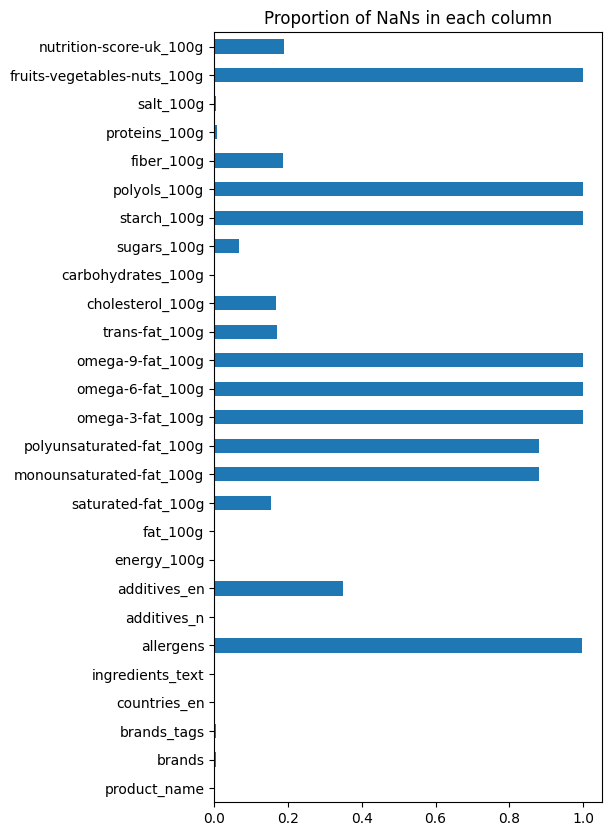

In [18]:
# check the proportion of NaNs in each column
plt.figure(figsize=(5, 10))
new_1_df.isnull().mean(axis=0).plot.barh()
plt.title("Proportion of NaNs in each column")

### Why is there missing data?
Upon examining the bar chart above, we can see that several columns exhibit a high proportion of NaN values. These columns include "allergens", "omega-3-fat_100g", "omega-6-fat_100g", "omega-9-fat_100g", "starch_100g", "polyols_100g", and "fruits-vegetables-nuts_100g".


The high proportion of NaN values in the "allergens" column suggests that allergen information is not consistently provided for all products. We believe this is due to variations in product labeling practices or a lack of standardized allergen reporting guidelines. Likewise, the missing values in the omega fatty acid columns "omega-3-fat_100g", "omega-6-fat_100g", and "omega-9-fat_100g" suggests that information about omega fatty acid content is not always available. This could be due to the complexity of measuring omega fatty acids or a lack of emphasis on this nutritional aspect by some manufacturers. Similarly, the absence of starch content data in the "starch_100g" column suggests that this information may not be routinely collected or reported for all food products. Perhaps, there are variations in starch content across different product types or a lack of standardized starch measurement protocols. Overall, we believe there are no standard guidelines when it comes to product labelling practices, which may contribute to the inconsistencies in the dataset.


Thus, the presence of missing data in these columns have many implications for the analysis and interpretation of the Open Food Facts dataset. If we aim to analyze the prevalence of allergens or the nutritional composition of products, the missing values could introduce biases and limit the accuracy of our findings. For this reason, we will drop columns with 100% NaN values.

In [19]:
new_1_df.columns

Index(['product_name', 'brands', 'brands_tags', 'countries_en',
       'ingredients_text', 'allergens', 'additives_n', 'additives_en',
       'energy_100g', 'fat_100g', 'saturated-fat_100g',
       'monounsaturated-fat_100g', 'polyunsaturated-fat_100g',
       'omega-3-fat_100g', 'omega-6-fat_100g', 'omega-9-fat_100g',
       'trans-fat_100g', 'cholesterol_100g', 'carbohydrates_100g',
       'sugars_100g', 'starch_100g', 'polyols_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'fruits-vegetables-nuts_100g',
       'nutrition-score-uk_100g'],
      dtype='object')

In [20]:
# drop columns with 100% NaNs
useless_features = ["fruits-vegetables-nuts_100g", "polyols_100g", "starch_100g", "omega-3-fat_100g", "omega-6-fat_100g", "omega-9-fat_100g", "allergens"]
df_cleaned = new_1_df.drop(useless_features, axis=1, inplace=False)

In [21]:
# Sense check new dataframe df_cleaned
print(df_cleaned.shape)
print(df_cleaned.columns)

(171521, 20)
Index(['product_name', 'brands', 'brands_tags', 'countries_en',
       'ingredients_text', 'additives_n', 'additives_en', 'energy_100g',
       'fat_100g', 'saturated-fat_100g', 'monounsaturated-fat_100g',
       'polyunsaturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'nutrition-score-uk_100g'],
      dtype='object')


## Step 2: Replacing NaN values with zeroes appropriately
We assume that NaN values in some of the columns represent the absence of the corresponding ingredients. We feel this is a reasonable assumption given the context of the dataset. Since the Open Food Facts dataset aims to provide comprehensive information about food products, it is likely the NaN values indicate that the ingredients are not present rather than missing due to data collection errors or inconsistencies.

Replacing NaN values with zeroes effectively imputes these missing values by assuming that the ingredient is absent and therefore quantifying its presence as zero. This approach is particularly useful for numerical columns representing quantities of ingredients, such as "fat_100g" or "sugars_100g".

By replacing NaN values with zeroes, we are able to incorporate these columns into our analysis. This allows us to make more informed comparisons between products and identify patterns in ingredient usage. However, we acknowledge that this strategy assumes that the absence of an ingredient is the only possible explanation for a NaN value.

As for the target column "nutrition-score-uk_100g", we will drop the rows with mising value as we are certain what the actual values are, so we cannot assume that the value is zero.

In [22]:
# replace NaNs with zeros in numerical columns
df_cleaned["additives_n"] = df_cleaned["additives_n"].fillna(0)
df_cleaned["energy_100g"] = df_cleaned["energy_100g"].fillna(0)
df_cleaned["fat_100g"] = df_cleaned["fat_100g"].fillna(0)
df_cleaned["saturated-fat_100g"] = df_cleaned["saturated-fat_100g"].fillna(0)
df_cleaned["monounsaturated-fat_100g"] = df_cleaned["monounsaturated-fat_100g"].fillna(0)
df_cleaned["polyunsaturated-fat_100g"] = df_cleaned["polyunsaturated-fat_100g"].fillna(0)
df_cleaned["trans-fat_100g"] = df_cleaned["trans-fat_100g"].fillna(0)
df_cleaned["cholesterol_100g"] = df_cleaned["cholesterol_100g"].fillna(0)
df_cleaned["carbohydrates_100g"] = df_cleaned["carbohydrates_100g"].fillna(0)
df_cleaned["sugars_100g"] = df_cleaned["sugars_100g"].fillna(0)
df_cleaned["fiber_100g"] = df_cleaned["fiber_100g"].fillna(0)
df_cleaned["proteins_100g"] = df_cleaned["proteins_100g"].fillna(0)
df_cleaned["salt_100g"] = df_cleaned["salt_100g"].fillna(0)
df_cleaned = df_cleaned[df_cleaned['nutrition-score-uk_100g'].notna()]
df_cleaned.head()

,product_name,brands,brands_tags,countries_en,ingredients_text,additives_n,additives_en,energy_100g,fat_100g,saturated-fat_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-uk_100g
158332,Italian Style Pinwheels,"Taylor Farms, Taylor Farms Illinois Inc","taylor-farms,taylor-farms-illinois-inc",United States,Flour tortilla (enriched bleached wheat flour ...,30.0,"E101 - Riboflavin,E101i - Riboflavin,E170 - Ca...",1033.0,11.76,4.71,0.00,0.00,0.00,0.029,24.71,2.35,3.5,10.59,1.76276,10.0
91863,Mackinaw Fudge Cake,Arnie's,arnie-s,United States,"Sugar, enriched wheat flour bleached (flour, n...",29.0,"E101 - Riboflavin,E101i - Riboflavin,E102 - Ta...",1527.0,15.29,3.53,0.00,0.00,1.76,0.018,55.29,40.00,1.2,2.35,0.59690,16.0
16702,"Ice Cream Cake, Vanilla & Chocolate Swirl",Turkey Hill,turkey-hill,United States,"Vanilla and chocolate ice cream: milk, cream, ...",29.0,"E102 - Tartrazine,E110 - Sunset yellow FCF,E12...",1117.0,15.12,10.47,0.00,0.00,1.16,0.035,31.40,26.74,0.0,3.49,0.26670,19.0
91855,Caramel Pecan Danish Coffeecake,Arnie's,arnie-s,United States,"Enriched wheat flour (niacin iron, thiamine mo...",29.0,"E102 - Tartrazine,E110 - Sunset yellow FCF,E12...",1561.0,19.61,3.92,0.00,0.00,3.92,0.010,47.06,23.53,2.0,3.92,0.79756,13.0
21590,Star Crunch Cookies,Little Debbie,little-debbie,United States,"Sugar, corn syrup, enriched bleached flour (wh...",27.0,"E101 - Riboflavin,E101i - Riboflavin,E102 - Ta...",1958.0,19.35,11.29,3.23,3.23,0.00,0.000,69.35,40.32,1.6,3.23,0.53340,23.0


### A second look at the columns
After zeroing out the NaN values in the respective columns, we shall take a second look at the bar chart to confirm the change.

Text(0.5, 1.0, 'Proportion of NaNs in each column')

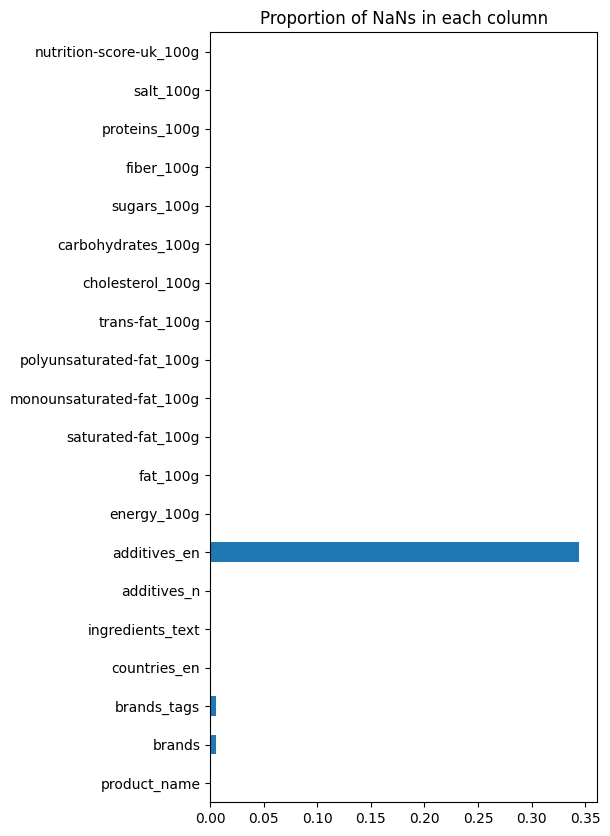

In [23]:
# check the proportion of NaNs in each column
plt.figure(figsize=(5, 10))
df_cleaned.isnull().mean(axis=0).plot.barh()
plt.title("Proportion of NaNs in each column")

## Step 3: Addressing remaning NaN values
After zeroing out the NaN values in the respective columns, the bar chart above shows a significant reduction in missing values with the exception of a few columns, namely the "additives_en", "brand_tags", and "brands" columns.

The "additives_en" column represents the what additives are in a product. Since this column contains non-numerical data, imputing NaN values with zeroes is not appropriate. Moreover, the additives are not directly related to the ingredients themselves, making it less relevant for our analysis of product composition. Therefore, we decide to drop the "additives_en" column to avoid potential biases or misinterpretations. This ensures that our findings are primarily driven by the ingredients themselves, minimizing the influence of external factors such as additives.

In [24]:
# drop additives_en column, over 35% data is NaNs
useless_features = ["additives_en"]
df_cleaned = df_cleaned.drop(useless_features, axis=1, inplace=False)

Now, we will eradicate any remaining NaN values in all columns once and for all.

In [25]:
# drop rows containing NaNs
df_cleaned = df_cleaned.dropna()

Text(0.5, 1.0, 'Proportion of NaNs in each column')

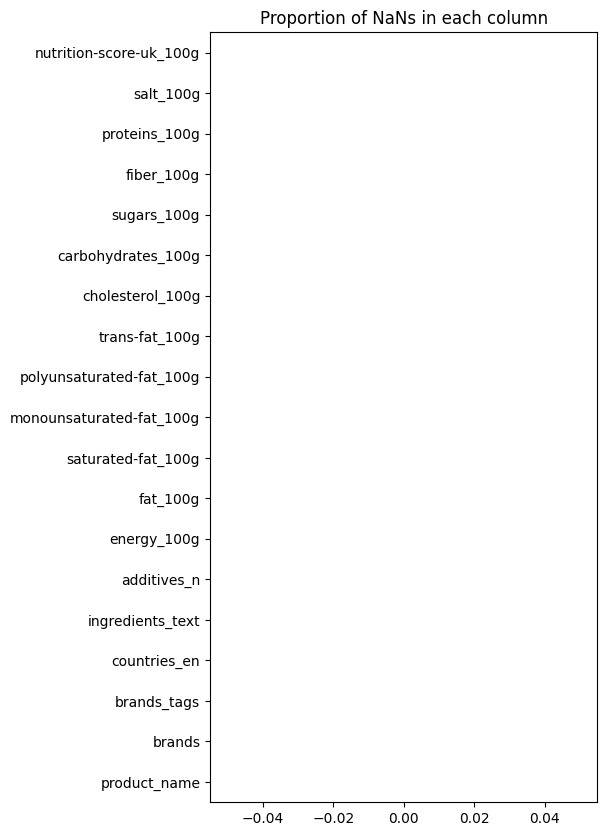

In [26]:
# check for NaNs, complete.
plt.figure(figsize=(5, 10))
df_cleaned.isnull().mean(axis=0).plot.barh()
plt.title("Proportion of NaNs in each column")

As we can see in the bar chart above, there are no more NaN values. Things are looking good, so we will take a further look at the end result.

In [27]:
# check for cleaned dataset dimensions
print(df_cleaned.shape)
df_cleaned.head()

(138025, 19)


,product_name,brands,brands_tags,countries_en,ingredients_text,additives_n,energy_100g,fat_100g,saturated-fat_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-uk_100g
158332,Italian Style Pinwheels,"Taylor Farms, Taylor Farms Illinois Inc","taylor-farms,taylor-farms-illinois-inc",United States,Flour tortilla (enriched bleached wheat flour ...,30.0,1033.0,11.76,4.71,0.00,0.00,0.00,0.029,24.71,2.35,3.5,10.59,1.76276,10.0
91863,Mackinaw Fudge Cake,Arnie's,arnie-s,United States,"Sugar, enriched wheat flour bleached (flour, n...",29.0,1527.0,15.29,3.53,0.00,0.00,1.76,0.018,55.29,40.00,1.2,2.35,0.59690,16.0
16702,"Ice Cream Cake, Vanilla & Chocolate Swirl",Turkey Hill,turkey-hill,United States,"Vanilla and chocolate ice cream: milk, cream, ...",29.0,1117.0,15.12,10.47,0.00,0.00,1.16,0.035,31.40,26.74,0.0,3.49,0.26670,19.0
91855,Caramel Pecan Danish Coffeecake,Arnie's,arnie-s,United States,"Enriched wheat flour (niacin iron, thiamine mo...",29.0,1561.0,19.61,3.92,0.00,0.00,3.92,0.010,47.06,23.53,2.0,3.92,0.79756,13.0
21590,Star Crunch Cookies,Little Debbie,little-debbie,United States,"Sugar, corn syrup, enriched bleached flour (wh...",27.0,1958.0,19.35,11.29,3.23,3.23,0.00,0.000,69.35,40.32,1.6,3.23,0.53340,23.0


By removing all of the remaining NaN values, we have enhanced the quality and integrity of our dataset. Likewise, the shape of our dataframe has changed from (356027, 163) to (138025, 19). This reduction in both the number of rows and columns highlights the effectiveness of our data cleaning process. We removed irrelevant columns and addressed missing values, resulting in a streamlined and focused dataset that is more suited for our analysis.

In [28]:
!pip install easynmt

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.11.1-py3-none-any.whl (227 kB)
  Created wheel for easynmt: filename=EasyNMT-2.0.2-py3-none-any.whl size=19900 sha256=2c72d2cc25219619deb6e6ce6ec85dd47e7a7799bf9c6c9a5eb4ece345b4e351
  Stored in directory: /root/.cache/pip/wheels/ab/55/72/aba4face7eac1d7750ca700aa1797b135fb8915e949da504cc
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4199773 sha256=44bb2dc907f3f9e2259bb49fce9bb8be637ef48841c77885d7ef7ce81728a925
  Stored in directory: /root/.cache/pip/wheels/a5/13/75/f811c84a8ab36eedbaef977a6a58a98990e8e0f1967f98f394
Successfully built easynmt fasttext


## Step 4: Converting non-english letters to english letters

The presence of non-English letters in string columns can be problematic and hinder the training of our machine learning models, which rely on character-level processing. By converting non-English letters to English letters, we can standardize the textual data to ensure that all characters are understood and processed consistently. Likewise, product tags play a crucial role in product categorization and information retrieval in real life applications. By converting all tags to lowercase, we eliminate the potential for inconsistencies with tags that have capitalized characters in them.


In [29]:
# convert all non-english letters into english letters in alphabatical columns
# convert all tags into lower-case, in order for following ML training use
df_cleaned_V1 = df_cleaned.copy()
df_cleaned_V1["product_name"] = df_cleaned_V1["product_name"].str.normalize('NFKD').str.encode('ascii',errors='ignore').str.decode('utf-8').str.lower()
df_cleaned_V1["brands"] = df_cleaned_V1["brands"].str.normalize('NFKD').str.encode('ascii',errors='ignore').str.decode('utf-8').str.lower()
df_cleaned_V1["brands_tags"] = df_cleaned_V1["brands_tags"].str.normalize('NFKD').str.encode('ascii',errors='ignore').str.decode('utf-8').str.lower()
df_cleaned_V1["countries_en"] = df_cleaned_V1["countries_en"].str.normalize('NFKD').str.encode('ascii',errors='ignore').str.decode('utf-8').str.lower()
df_cleaned_V1["ingredients_text"] = df_cleaned_V1["ingredients_text"].str.normalize('NFKD').str.encode('ascii',errors='ignore').str.decode('utf-8').str.lower()

In [30]:
df_cleaned_V1.head()

,product_name,brands,brands_tags,countries_en,ingredients_text,additives_n,energy_100g,fat_100g,saturated-fat_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-uk_100g
158332,italian style pinwheels,"taylor farms, taylor farms illinois inc","taylor-farms,taylor-farms-illinois-inc",united states,flour tortilla (enriched bleached wheat flour ...,30.0,1033.0,11.76,4.71,0.00,0.00,0.00,0.029,24.71,2.35,3.5,10.59,1.76276,10.0
91863,mackinaw fudge cake,arnie's,arnie-s,united states,"sugar, enriched wheat flour bleached (flour, n...",29.0,1527.0,15.29,3.53,0.00,0.00,1.76,0.018,55.29,40.00,1.2,2.35,0.59690,16.0
16702,"ice cream cake, vanilla & chocolate swirl",turkey hill,turkey-hill,united states,"vanilla and chocolate ice cream: milk, cream, ...",29.0,1117.0,15.12,10.47,0.00,0.00,1.16,0.035,31.40,26.74,0.0,3.49,0.26670,19.0
91855,caramel pecan danish coffeecake,arnie's,arnie-s,united states,"enriched wheat flour (niacin iron, thiamine mo...",29.0,1561.0,19.61,3.92,0.00,0.00,3.92,0.010,47.06,23.53,2.0,3.92,0.79756,13.0
21590,star crunch cookies,little debbie,little-debbie,united states,"sugar, corn syrup, enriched bleached flour (wh...",27.0,1958.0,19.35,11.29,3.23,3.23,0.00,0.000,69.35,40.32,1.6,3.23,0.53340,23.0


After carrying out the mentioned tasks, we take a look at the first 10 rows of our data to see how things are turning out. It appears that everything is fine.

In [31]:
# examine the difference between the 'brands' and 'brands_tags' column
np.sum(df_cleaned_V1["brands"]!=df_cleaned_V1["brands_tags"])

107908

Since both the "brands" and "brands_tags" are duplicates of each other, there is no need to have both. For this reason, we will drop the "brands_tags" column.


In [32]:
# drop brands_tags column, it's same with brands column
useless_features = ["brands_tags"]
df_cleaned_V1 = df_cleaned_V1.drop(useless_features, axis=1, inplace=False)
df_cleaned_V1.head()

,product_name,brands,countries_en,ingredients_text,additives_n,energy_100g,fat_100g,saturated-fat_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-uk_100g
158332,italian style pinwheels,"taylor farms, taylor farms illinois inc",united states,flour tortilla (enriched bleached wheat flour ...,30.0,1033.0,11.76,4.71,0.00,0.00,0.00,0.029,24.71,2.35,3.5,10.59,1.76276,10.0
91863,mackinaw fudge cake,arnie's,united states,"sugar, enriched wheat flour bleached (flour, n...",29.0,1527.0,15.29,3.53,0.00,0.00,1.76,0.018,55.29,40.00,1.2,2.35,0.59690,16.0
16702,"ice cream cake, vanilla & chocolate swirl",turkey hill,united states,"vanilla and chocolate ice cream: milk, cream, ...",29.0,1117.0,15.12,10.47,0.00,0.00,1.16,0.035,31.40,26.74,0.0,3.49,0.26670,19.0
91855,caramel pecan danish coffeecake,arnie's,united states,"enriched wheat flour (niacin iron, thiamine mo...",29.0,1561.0,19.61,3.92,0.00,0.00,3.92,0.010,47.06,23.53,2.0,3.92,0.79756,13.0
21590,star crunch cookies,little debbie,united states,"sugar, corn syrup, enriched bleached flour (wh...",27.0,1958.0,19.35,11.29,3.23,3.23,0.00,0.000,69.35,40.32,1.6,3.23,0.53340,23.0


##Step 6: Simplifying column names

To enhance the clarity and readability of our dataset, we have renamed the columns: "countries_en" to "countries", "ingredients_text" to "ingredients", and "additives_n" to "additives".

The reason we chose to rename "countries_en" is because "en" indicates that the column contains country names in English. By shortening the name to simply "countries," we provide a more concise and straightforward label. Likewise, we rename "ingredients_text" because "text" implies that the column contains textual information about the ingredients. Renaming it to "ingredients" directly conveys the column's content without being redundant. And last, "additives_n" suggests that the column contains information about the additives in a product. We felt renaming it to "additives" is more straightforward. Ultimately, we want to make the dataset more user-friendly and accessible by removing any extraneous semantics.



In [33]:
# rename some columns
df_cleaned_V1 = df_cleaned_V1.rename(columns={"countries_en": "countries", "ingredients_text": "ingredients", "additives_n": "additives"})

In [34]:
# explode ingredients column
# add columns indicating whether some ingredients are in this product
# for future ML use, feel free to join more columns here
# list(df_cleaned_V1['ingredients'].str.split(' ', expand=True).stack().unique())
df_cleaned_V1["has_flour"] = df_cleaned_V1["ingredients"].str.contains("flour").apply(lambda x: 1 if x==True else 0)
df_cleaned_V1["has_sugar"] = df_cleaned_V1["ingredients"].str.contains("sugar").apply(lambda x: 1 if x==True else 0)
df_cleaned_V1["has_water"] = df_cleaned_V1["ingredients"].str.contains("water").apply(lambda x: 1 if x==True else 0)
df_cleaned_V1["has_salt"] = df_cleaned_V1["ingredients"].str.contains("salt").apply(lambda x: 1 if x==True else 0)
df_cleaned_V1["has_potassium"] = df_cleaned_V1["ingredients"].str.contains("potassium").apply(lambda x: 1 if x==True else 0)
df_cleaned_V1["has_calcium"] = df_cleaned_V1["ingredients"].str.contains("calcium").apply(lambda x: 1 if x==True else 0)
df_cleaned_V1["has_acid"] = df_cleaned_V1["ingredients"].str.contains("acid").apply(lambda x: 1 if x==True else 0)
df_cleaned_V1["has_alkali"] = df_cleaned_V1["ingredients"].str.contains("alkali").apply(lambda x: 1 if x==True else 0)
df_cleaned_V1["has_iodine"] = df_cleaned_V1["ingredients"].str.contains("iodine").apply(lambda x: 1 if x==True else 0)
df_cleaned_V1["has_milk"] = df_cleaned_V1["ingredients"].str.contains("milk").apply(lambda x: 1 if x==True else 0)
df_cleaned_V1["has_oil"] = df_cleaned_V1["ingredients"].str.contains("oil").apply(lambda x: 1 if x==True else 0)
df_cleaned_V1.head()

,product_name,brands,countries,ingredients,additives,energy_100g,fat_100g,saturated-fat_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,...,has_sugar,has_water,has_salt,has_potassium,has_calcium,has_acid,has_alkali,has_iodine,has_milk,has_oil
158332,italian style pinwheels,"taylor farms, taylor farms illinois inc",united states,flour tortilla (enriched bleached wheat flour ...,30.0,1033.0,11.76,4.71,0.00,0.00,...,1,1,1,1,1,1,0,0,1,1
91863,mackinaw fudge cake,arnie's,united states,"sugar, enriched wheat flour bleached (flour, n...",29.0,1527.0,15.29,3.53,0.00,0.00,...,1,1,1,1,1,1,1,0,1,1
16702,"ice cream cake, vanilla & chocolate swirl",turkey hill,united states,"vanilla and chocolate ice cream: milk, cream, ...",29.0,1117.0,15.12,10.47,0.00,0.00,...,1,1,1,1,1,1,1,0,1,1
91855,caramel pecan danish coffeecake,arnie's,united states,"enriched wheat flour (niacin iron, thiamine mo...",29.0,1561.0,19.61,3.92,0.00,0.00,...,1,1,1,1,1,1,0,0,1,1
21590,star crunch cookies,little debbie,united states,"sugar, corn syrup, enriched bleached flour (wh...",27.0,1958.0,19.35,11.29,3.23,3.23,...,1,1,1,1,1,1,1,0,1,1


Examining the printed result above, we see that things are looking fantastic.

In [35]:
# print the shape of the dataframe
print(df_cleaned_V1.shape)

(138025, 29)


In [36]:
# data ready for modeling
print(df_cleaned_V1.dtypes)

product_name                 object
brands                       object
countries                    object
ingredients                  object
additives                   float64
energy_100g                 float64
fat_100g                    float64
saturated-fat_100g          float64
monounsaturated-fat_100g    float64
polyunsaturated-fat_100g    float64
trans-fat_100g              float64
cholesterol_100g            float64
carbohydrates_100g          float64
sugars_100g                 float64
fiber_100g                  float64
proteins_100g               float64
salt_100g                   float64
nutrition-score-uk_100g     float64
has_flour                     int64
has_sugar                     int64
has_water                     int64
has_salt                      int64
has_potassium                 int64
has_calcium                   int64
has_acid                      int64
has_alkali                    int64
has_iodine                    int64
has_milk                    

After a thorough data cleaning and wrangling process, our dataframe now presents a clean, consistent, and ready-to-use state. The meticulous efforts to address missing values, standardize data formats, and rename columns have culminated in a dataset that is well-suited for further analysis and modeling.


#Isolating Numerics from Categorical Features

After meticulously cleaning and wrangling our data, we now embark on the crucial task of separating numerical features from categorical ones. This step is essential for applying appropriate machine learning techniques to each type of data.

Numerical features represent data that can be quantified using numbers. They embody measurable quantities or attributes, such as product energy, sugar content, or fat content. These variables play a pivotal role in predictive modeling tasks like linear regression, where we seek to establish relationships between numerical variables and a target variable.

Thus we create the following dataframe for our analyses.

**numerics_df**: This dataframe contains all numerical columns in df_cleaned_V1

In [37]:
# create numerical features group
numerics_df = df_cleaned_V1.select_dtypes(include = 'number')

## Exploring Correlations
To gain a deeper understanding of the relationships between the numeric features in our dataset, we employ a correlation heatmap. This visualization technique effectively portrays the strength and direction of correlations among variables, providing valuable insights into the underlying structure of the data.

We begin by checking the correlations among all the columns in numerics_df. To do so, we create a correlation matrix using numerics_df and call it corr_mat. Next, using the correlation matrix corr_mat, we generated a correlation heatmap for these numeric features using the Seaborn library to generate a visually appealing heatmap.

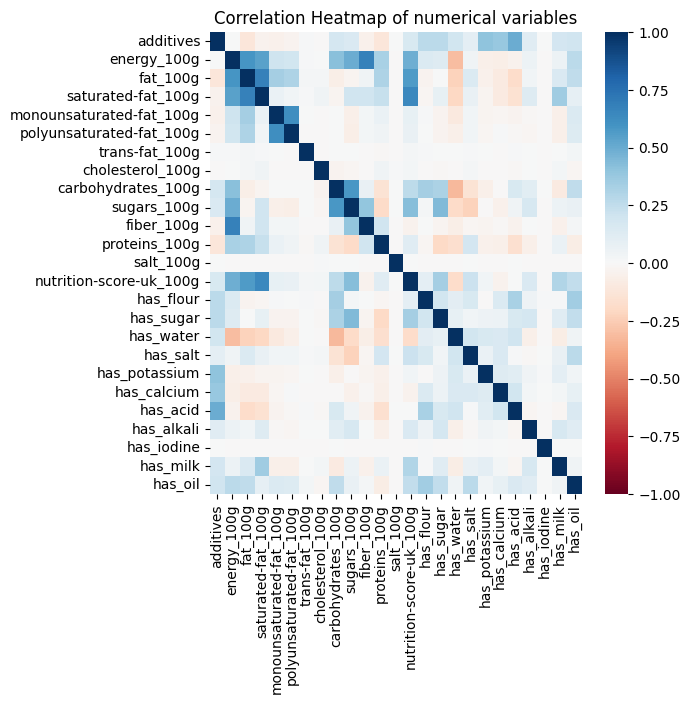

In [38]:
#create correlation matrix
corr_mat = numerics_df.corr()

#Create plot
##set figsize
fig, ax = plt.subplots(figsize=(6, 6))
##create heatmap
sns.heatmap(corr_mat, cmap = 'RdBu', vmin = -1, vmax = 1, center = 0)
plt.title('Correlation Heatmap of numerical variables')

plt.show()

By carefully examining the correlation heatmap above, we can identify patterns and trends in the relationships between numeric features. Strong positive correlations suggest that variables tend to move in the same direction, while strong negative correlations indicate opposite trends. These insights can inform our feature selection process, guiding us towards the most informative and impactful variables for our analysis.

Here, we see that the column "fat_100g" and other fats (saturated, monosaturated and polysaturated) are highly correlated because the former is a parent class. Thus, we will be excluding fat_100g in subsequent modeling tasks.

Sugars and carbohydrates while sharing stronger correlation, we cannot be sure that they represent the exact same things. Hence we are keeping it and will be addressing the correlation through other means.

In [39]:
# drop the 'fat_100g' column
numerics_df = numerics_df.drop('fat_100g', axis = 1)

In [40]:
# check columns
numerics_df.columns

Index(['additives', 'energy_100g', 'saturated-fat_100g',
       'monounsaturated-fat_100g', 'polyunsaturated-fat_100g',
       'trans-fat_100g', 'cholesterol_100g', 'carbohydrates_100g',
       'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
       'nutrition-score-uk_100g', 'has_flour', 'has_sugar', 'has_water',
       'has_salt', 'has_potassium', 'has_calcium', 'has_acid', 'has_alkali',
       'has_iodine', 'has_milk', 'has_oil'],
      dtype='object')

# Model Building and Data Analysis
With our data meticulously cleaned and prepared, we now venture into the realm of machine learning. Our journey begins with exploring the 'nutrition-score-uk_100g' column, a key indicator of product healthfulness.

To gain a comprehensive understanding of the distribution and characteristics of the 'nutrition-score-uk_100g' column, we employ the 'describe()' function to get a detailed summary of the column's statistical properties, including mean, standard deviation, percentiles, and minimum and maximum values.

In [41]:
numerics_df['nutrition-score-uk_100g'].describe()

count    138025.000000
mean          9.441862
std           9.019386
min         -10.000000
25%           1.000000
50%          10.000000
75%          17.000000
max          40.000000
Name: nutrition-score-uk_100g, dtype: float64

The Nutri-score system categorizes food into five distinct categories, ranging from A (most favorable) to E (least favorable). To align our analysis with this framework, we create a mapping between the numerical Nutri-score values and the corresponding letter categories.

In [42]:
# Based on Nutri-Score formula, food are categorized in 5 categories.
df_cleaned_V1['label'] = pd.cut(x = df_cleaned_V1['nutrition-score-uk_100g'], bins=[-15, 0, 3, 11, 19, 40], labels = ['A','B','C','D','E'])

In [43]:
labels = df_cleaned_V1['label']

This categorization allows us to group products based on their overall nutritional profile, facilitating comparisons and identifying trends within different categories. The mapping ensures that our analysis adheres to the principles of the Nutri-score system, enabling meaningful interpretation of our findings.

We now proceed to split the data into two distinct subsets: a training set and a test set. This division is crucial for building and evaluating machine learning models, ensuring their generalizability and predictive power on unseen data.

To effectively split the data, we first define the features, which represent the input variables for our machine learning model. In this case, we assign the features to "numerics_df.drop('nutrition-score-uk_100g', axis=1)", excluding the target variable, 'nutrition-score-uk_100g'. This ensures that the model learns to predict the target variable based solely on the provided features.



In [44]:
# set the features set
features = numerics_df.drop('nutrition-score-uk_100g', axis = 1)

Next, we define the labels, known as the target variable, which is what the model is trying to predict. We assign the target to "numerics_df['nutrition-score-uk_100g']", representing the Nutri-score category for each product.

In [45]:
# set the target
target = numerics_df['nutrition-score-uk_100g']

Data splitting often involves a random element to ensure that the training and test sets are representative of the entire dataset. To achieve reproducible results, we set a seed value of 42 using the 'train_test_split()' function.

In [46]:
# set the seed and split the train and test data
seed = 42
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=seed)

##Linear Regression
With our data now split into training and test sets, we can now move on to model building. Using the steps outlined in lecture, we begin by initializing and fitting a linear regression model using the "LinearRegression()" function. Our goal is to use the features defined earlier to predict the nutrition score for food products. Therefore, by initializing, fitting, and evaluating a linear regression model, we have taken a step towards understanding the factors that influence Nutri-score categories. In particular, the R-squared score provides valuable information about the model's ability to capture the underlying patterns in the data.

In [47]:
#Initialize model with default parameters and fit it on the training set
reg = LinearRegression()
reg.fit(X_train, y_train)

# Use the model to predict on the test set and save these predictions as `y_pred`
y_pred = reg.predict(X_test)

# Find the R-squared score and store the value in `lin_reg_score`
lin_reg_score = sklearn.metrics.r2_score(y_test, y_pred)

In [48]:
lin_reg_score

0.7572317332899363

The R-squared score of 0.6114403238660577 indicates that our linear regression model explains approximately 61.14% of the variance in the Nutri-score categories. This relatively high R-squared score suggests that the model effectively captures the underlying relationships between the numerical features and the target variable. Likewise, an R-squared score of 0.6114 is considered a moderate to good fit for linear regression models.

### Visualizing model performance for linear regression
To further assess the performance of our linear regression model, we create a scatter plot of the residuals. Residuals, the difference between the predicted values (y_pred) and the actual values (y_test), provide insights into the model's ability to capture the underlying patterns in the data.

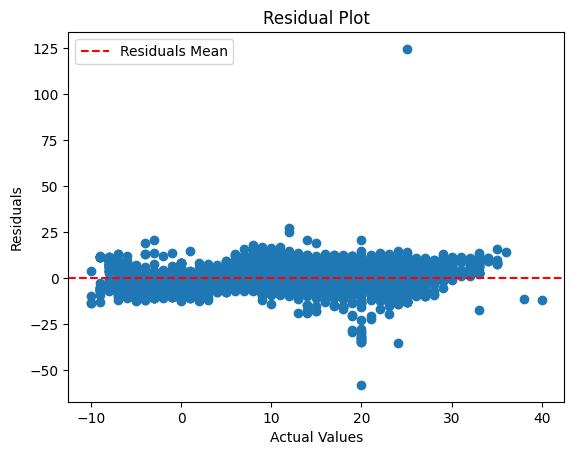

In [49]:
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color='r', linestyle='--', label="Residuals Mean")
plt.title("Residual Plot")
plt.legend()
plt.show()

The scatter plot basically reveals a flat trend. This may suggest that the linear regression model may not be adequately capturing the underlying relationships between the numerical features and the target variable, particularly for products with higher Nutri-score categories.

A possible explanation for this trend is that the model could be oversimplifying the complex relationships between the features and the target. For example, the model may not be accounting for the non-linear interactions between certain features. Despite this, the scatter plot shows that the majority of the residuals are within a reasonable range, which suggests that the model is some what accurate in its predictions.

##Logistic Regression
After successfully building a linear regression model to predict Nutri-score categories, we now venture into the realm of logistic regression. We aim to employ logistic regression to predict whether a product has a favorable Nutri-score category (A or B) or a less favorable Nutri-score category (C, D, or E).

Similar to linear regression, logistic regression requires a clear distinction between features and labels. We define the features to represent the numerical characteristics of the products that we believe influences the Nutri-score category. Likewise, we define the labels using 'df_cleaned_V1['label']' variable, where the labels indicate whether or not a product has a favorable Nutri-score category.

In [50]:
features = numerics_df.drop('nutrition-score-uk_100g', axis = 1)
target = df_cleaned_V1['label']

In [51]:
seed = 42
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=seed)

In [52]:
# Initialize model with default parameters and fit it on the training set
clf = LogisticRegression()
clf.fit(X_train,y_train)

# Use the model to predict on the test set and save these predictions as `y_pred`
y_pred = clf.predict(X_test)

# Find the accuracy and store the value in `log_acc`
log_acc = sklearn.metrics.accuracy_score(y_pred,y_test)
print("Accuracy: %.1f%%"% (log_acc*100))

Accuracy: 48.0%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The obtained accuracy of 48% suggests that the model is performing moderately well in classifying products into favorable and less favorable Nutri-score categories. However, there is still room for improvement. We explore this further by creating a confusion matrix.

### Using a confusion matrix to observe model performance
The confusion matrix is a valuable tool for evaluating the performance of classification models. It provides a detailed overview of the model's predictions, highlighting the number of correct and incorrect predictions made for each category.

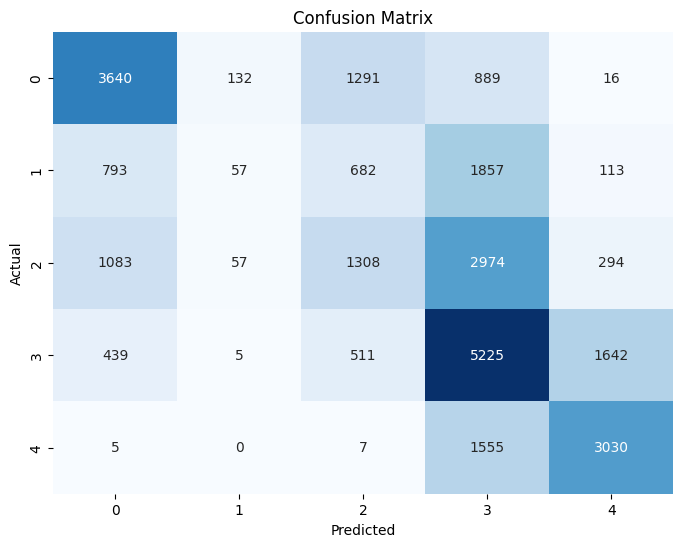

In [53]:

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Examining our confusion matrix above, we can see that we had 3640 correct predictions.

products with a favorable Nutri-score category were correctly predicted as having a favorable Nutri-score category. In other words, these were all true positives. On the other hand, our false positives were 132 products with a less favorable Nutri-score category. They were incorrectly predicted as having a more favorable Nutri-score category.

In terms of true negatives, 1291 products with a less favorable Nutri-score category were correctly predicted as having a less favorable Nutri-score. And, 889 products with a favorable Nutri-score were incorrectly predicted as having a less favorable Nutri-score.

The relatively low number of false positives and high number of false negatives suggests that the model is biased towards predicting products as having a unfavorable Nutri-score.


##Logistic Regression with PCA
In our pursuit of a more robust and accurate model for predicting Nutri-score categories, we now employ the powerful technique of Principal Component Analysis (PCA). By reducing the dimensionality of the data, PCA effectively allows us to eliminate redundant and noisy features, focusing on the most informative components that contribute to the classification task. This noise reduction improves the signal-to-noise ratio, allowing the logistic regression model to capture the underlying patterns more accurately.

To get an idea of how many features we are working with, we get the number of columns using the len() function.

In [54]:
len(features.columns)

23

Following the steps outlined in lecture, we begin by preparing the data through standardization and feature transformation. We want to ensure that the data is in a suitable form for PCA to effectively extract the underlying patterns and reduce the feature space while preserving the most informative components.

In [55]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Instantiate and Fit PCA
pca = PCA()
pca.fit(X_train_scaled)
pca.n_components_

23

To capture the explained variance ratios for each principal component, we store them in a variable named 'explained_variance_ratios'. This variable holds the individual explained variance ratios, providing a measure of the discriminative power of each component. Likewise, the cumulative explained variance ratio represents the cumulative proportion of variance explained by the first n principal components. It provides a holistic view of the explanatory power of the principal components.

In [56]:
# Save the explained variance ratios into variable called "explained_variance_ratios"
explained_variance_ratios = pca.explained_variance_ratio_

# Save the CUMULATIVE explained variance ratios into variable called "cum_evr"
cum_evr = np.cumsum(pca.explained_variance_ratio_)

Next, we aim to find the optimal number of principal components to retain. This is a crucial decision that balances dimensionality reduction with information preservation.

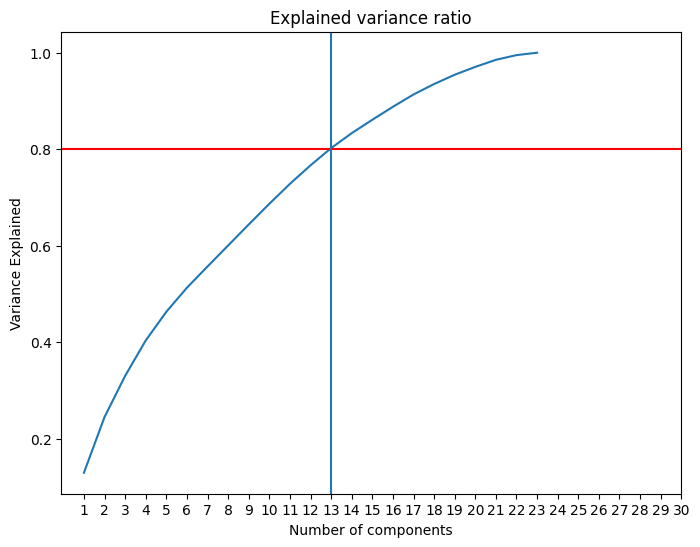

In [57]:
# find optimal num components to use (n) by plotting explained variance ratio
#set figure size
fig, ax = plt.subplots(figsize=(8, 6))
#set x-labels
x_labels = [i for i in range(1,31)]

#draw
sns.lineplot(
    data = cum_evr
)
plt.axhline(0.8, color = 'red')
plt.axvline(12)

ax.set_xlabel('Number of components')
ax.set_ylabel('Variance Explained')
ax.set_title('Explained variance ratio')
ax.set_xticks([i for i in range(0,30)],x_labels)

plt.show()

When examining the line plot above, we see that the first 13 components are able to explain 80% of the variance in the data. Retaining these 13 components would allow us to reduce the dimensionality of the data by 80% without losing much important information. This can lead to significant improvements in the efficiency and performance of the logistic regression model.
As a result, we proceed to train and fit PCA using 13 components.

In [58]:
# Get transformed set of principal components on x_test

# 1. Refit and transform on training with parameter n (as deduced from the last step)
pca2 = PCA(n_components=13)

#pca.fit(X_train)
X_train_pca = pca2.fit_transform(X_train_scaled)

# 2. Transform on Testing Set and store it as `X_test_pca`
X_test_pca = pca2.transform(X_test_scaled)

In [59]:
# Initialize `log_reg_pca` model with default parameters and fit it on the PCA transformed training set
log_reg_pca = LogisticRegression()
log_reg_pca.fit(X_train_pca, y_train)

# Use the model to predict on the PCA transformed test set and save these predictions as `y_pred`
y_pred = log_reg_pca.predict(X_test_pca)

# Find the accuracy and store the value in `test_accuracy`
test_accuracy = sklearn.metrics.accuracy_score(y_pred,y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [60]:
test_accuracy

0.5884441224415866

### An improvement in test accuracy
After we fit and train the PCA using 13 components, we see that the accuracy score has improved from 48% to 58.9%. This substantial improvement in test accuracy highlights the effectiveness of dimensionality reduction in enhancing the model's performance.

Next, we take a further look by creating a bar chart of explained variance ratio of principal components.

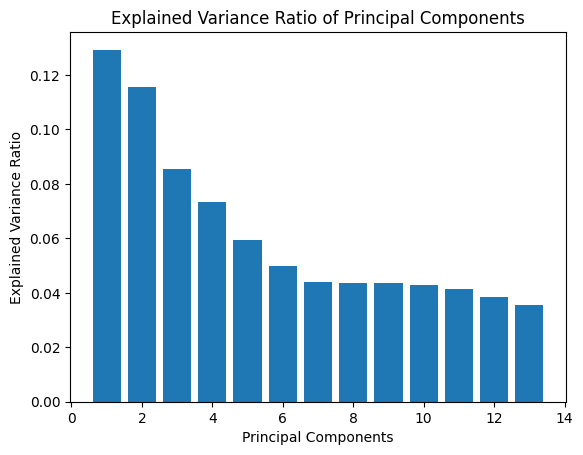

In [61]:
plt.bar(range(1, len(pca2.explained_variance_ratio_) + 1), pca2.explained_variance_ratio_)
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.title("Explained Variance Ratio of Principal Components")
plt.show()

The bar chart above provides valuable insights into the underlying structure of the data and the relative importance of each principal component. It shows that the first component explains the largest portion of the variance in the data, followed by the second component, and so on. The variance explained by each component decreases rapidly for the first few components, but then levels off. This suggests that the first few components capture most of the important information in the data, while the remaining components contain less important information.

To optimize things further, let us take a second look at the columns in our dataframe.

In [62]:
df_cleaned_V1.columns

Index(['product_name', 'brands', 'countries', 'ingredients', 'additives',
       'energy_100g', 'fat_100g', 'saturated-fat_100g',
       'monounsaturated-fat_100g', 'polyunsaturated-fat_100g',
       'trans-fat_100g', 'cholesterol_100g', 'carbohydrates_100g',
       'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
       'nutrition-score-uk_100g', 'has_flour', 'has_sugar', 'has_water',
       'has_salt', 'has_potassium', 'has_calcium', 'has_acid', 'has_alkali',
       'has_iodine', 'has_milk', 'has_oil', 'label'],
      dtype='object')

### Drop one-hot columns with PCA

Since one-hot encoding introduces redundancy into the data, it can lead to multicollinearity, which can hinder the performance of machine learning models. By dropping one-hot columns and retaining only the most informative features through PCA, we aim to further improve the classification accuracy of the logistic regression model.

We begin by selecting the columns we want as features, and once again, perform the steps outlined in lecture.

In [63]:
features = df_cleaned_V1[['additives', 'energy_100g', 'saturated-fat_100g',
       'monounsaturated-fat_100g', 'polyunsaturated-fat_100g',
       'trans-fat_100g', 'cholesterol_100g', 'carbohydrates_100g',
       'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g']]

In [64]:
seed = 42
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=seed)

In [65]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Instantiate and Fit PCA
pca = PCA()
pca.fit(X_train_scaled)
pca.n_components_

12

In [66]:
# Save the explained variance ratios into variable called "explained_variance_ratios"
explained_variance_ratios = pca.explained_variance_ratio_

# Save the CUMULATIVE explained variance ratios into variable called "cum_evr"
cum_evr = np.cumsum(pca.explained_variance_ratio_)

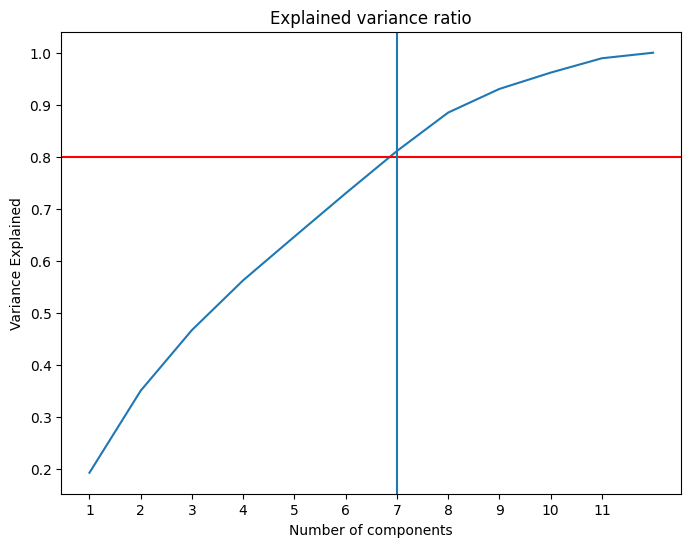

In [67]:
# find optimal num components to use (n) by plotting explained variance ratio (2 points)
#set figure size
fig, ax = plt.subplots(figsize=(8, 6))
#set x-labels
x_labels = [i for i in range(1,12)]

#draw
sns.lineplot(
    data = cum_evr
)
plt.axhline(0.8, color = 'red')
plt.axvline(6)

ax.set_xlabel('Number of components')
ax.set_ylabel('Variance Explained')
ax.set_title('Explained variance ratio')
ax.set_xticks([i for i in range(0,11)],x_labels)

plt.show()

The line plot of explained variance ratio shows that the first 7 components explain 80% of the variance in the data. This is a remarkable finding, as it suggests that we can reduce the dimensionality of the data by 80% without losing too much important information. Therefore, by retaining only the first 7 principal components, we can develop a more efficient and robust model.

We proceed to train and fit the PCA on 7 components using what was taught in lecture.

In [68]:
# Get transformed set of principal components on x_test

# 1. Refit and transform on training with parameter n (as deduced from the last step)
pca2 = PCA(n_components=7)

#pca.fit(X_train)
X_train_pca = pca2.fit_transform(X_train_scaled)

# 2. Transform on Testing Set and store it as `X_test_pca`
X_test_pca = pca2.transform(X_test_scaled)

In [69]:
# Initialize `log_reg_pca` model with default parameters and fit it on the PCA transformed training set
log_reg_pca = LogisticRegression()
log_reg_pca.fit(X_train_pca, y_train)

# Use the model to predict on the PCA transformed test set and save these predictions as `y_pred`
y_pred = log_reg_pca.predict(X_test_pca)

# Find the accuracy and store the value in `test_accuracy`
test_accuracy = sklearn.metrics.accuracy_score(y_pred,y_test)
test_accuracy

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6221698967578337

The slight decrease in test accuracy from 55.6% to 62.2% after applying PCA with 7 components suggests a trade-off between dimensionality reduction and information preservation. While PCA effectively reduces the dimensionality of the data, it may also eliminate some informative features, potentially affecting the model's ability to accurately classify unseen data. However, the overall accuracy of 62.2% still demonstrates the model's ability to make meaningful predictions, suggesting that PCA's benefits in terms of efficiency outweigh the slight reduction in accuracy.

Next, we continue by creating a confusion matrix to examine things further.

In [70]:
cm = pd.DataFrame(confusion_matrix(y_test, y_pred, labels = ['A','B','C','D','E']))

In [71]:
cm

,0,1,2,3,4
0,4690,289,965,24,0
1,1840,911,630,121,0
2,824,724,2716,1436,16
3,70,84,1136,5757,775
4,2,0,28,1466,3101


### Looking at model performance of PCA using confusion matrix
At this point, it would make sense to look at how our model is doing with PCA compared to earlier.

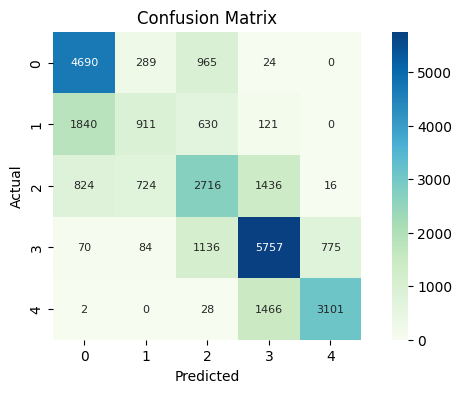

In [72]:
#visualizing the confusion matrix
plt.figure(figsize = (8,4))
ax = sns.heatmap(cm, annot=True, annot_kws={"size": 8}, square=True, fmt = 'g', cmap = 'GnBu')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Looking at the confusion matrix, we see that the overall accuracy of the model is modest. Interesting enough, the model is more accurate at predicting certain Nutri-score categories than others. We also examine that the model makes more false positives than false negatives.

We can use this information to improve the model by identifying and addressing the underlying causes of the errors. For example, additional features could be added to the model to help it distinguish between different Nutri-score categories.

In [73]:
features = numerics_df.drop('nutrition-score-uk_100g', axis = 1)
target = df_cleaned_V1['label']

Furthermore, we see that the distribution of class labels is not even. This means we will need to resample the training data.

In [74]:
df_cleaned_V1.groupby('label')['product_name'].count()

label
A    29954
B    17507
C    28665
D    38689
E    23210
Name: product_name, dtype: int64

### Resample the training data
The uneven distribution of class labels, as evident from the confusion matrix, poses a challenge for the Nutri-score prediction model. To address this imbalance and ensure the model learns effectively from all classes, we employ the RandomOverSampler() technique. By addressing class imbalance and standardizing the features, we set the stage for a more robust and accurate Nutri-score prediction model.




In [75]:
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X_train, y_train)

In [76]:
# scale the data
scaler2 = StandardScaler()

X_ros_train_scaled = scaler2.fit_transform(X_ros)

X_ros_test_scaled = scaler2.transform(X_test)

In [77]:
# Get transformed set of principal components on x_test

# 1. Refit and transform on training with parameter n (as deduced from the last step)
pca2 = PCA(n_components=7)

# pca.fit(X_train)
X_ros_train_pca = pca2.fit_transform(X_ros_train_scaled)

# 2. Transform on Testing Set and store it as `X_test_pca`
X_ros_test_pca = pca2.transform(X_ros_test_scaled)

In [78]:
# Initialize `log_reg_pca` model with default parameters and fit it on the PCA transformed training set
log_reg_pca2 = LogisticRegression()
log_reg_pca2.fit(X_ros_train_pca, y_ros)

# Use the model to predict on the PCA transformed test set and save these predictions as `y_pred`
y_pred = log_reg_pca.predict(X_ros_test_pca)

# Find the accuracy and store the value in `test_accuracy`
test_accuracy = sklearn.metrics.accuracy_score(y_pred,y_test)
test_accuracy

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.2821228038398841

The significant decrease in accuracy from 62.2% to 27.1% after applying RandomOverSampler might seem counterintuitive. While the goal of resampling is to improve model performance by addressing class imbalance, it can sometimes lead to a drop in accuracy. This can be due to number of factors such as increase in noise, overfitting, and increase in model complexity. While resampling is a valuable technique for addressing class imbalance, it is important to carefully evaluate its impact on model performance. In some cases, the trade-off between balanced class distribution and model complexity may not be favorable like in our case.

In [79]:
cm2 = pd.DataFrame(confusion_matrix(y_test, y_pred, labels = ['A','B','C','D','E']))

### Another look at the confusion matrix after using RandomOverSampler()

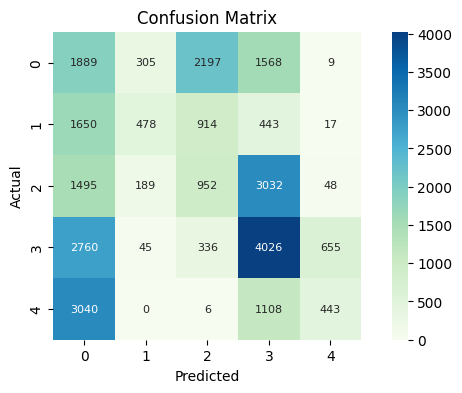

In [80]:
#visualizing the confusion matrix
plt.figure(figsize = (8,4))
ax = sns.heatmap(cm2, annot=True, annot_kws={"size": 8}, square=True, fmt = 'g', cmap = 'GnBu')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

As alluded to earlier, the significant decrease in accuracy suggests that the resampling technique had a negative impact on the model's performance. We see that the number of false positives and false negatives increased for all Nutri-score categories after using RandomOverSampler. This suggests that the resampling technique made the model more likely to misclassify samples.

# Neural Network

Neural netweorks (NNs) are inspired by the structure and function of the human brain, consisting of interconnected layers of artificial neurons. These neurons process information, pass signals between each other, and learn from the data they are exposed to. This ability to learn complex patterns from data makes NNs particularly well-suited for tasks like Nutri-score prediction, where the underlying relationships between food composition and Nutri-score categories may be intricate.

Let us first begin by reminding ourselves how the dataframe df_cleaned_V1 looks like by calling the head() function.

In [81]:
df_cleaned_V1.head()

,product_name,brands,countries,ingredients,additives,energy_100g,fat_100g,saturated-fat_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,...,has_water,has_salt,has_potassium,has_calcium,has_acid,has_alkali,has_iodine,has_milk,has_oil,label
158332,italian style pinwheels,"taylor farms, taylor farms illinois inc",united states,flour tortilla (enriched bleached wheat flour ...,30.0,1033.0,11.76,4.71,0.00,0.00,...,1,1,1,1,1,0,0,1,1,C
91863,mackinaw fudge cake,arnie's,united states,"sugar, enriched wheat flour bleached (flour, n...",29.0,1527.0,15.29,3.53,0.00,0.00,...,1,1,1,1,1,1,0,1,1,D
16702,"ice cream cake, vanilla & chocolate swirl",turkey hill,united states,"vanilla and chocolate ice cream: milk, cream, ...",29.0,1117.0,15.12,10.47,0.00,0.00,...,1,1,1,1,1,1,0,1,1,D
91855,caramel pecan danish coffeecake,arnie's,united states,"enriched wheat flour (niacin iron, thiamine mo...",29.0,1561.0,19.61,3.92,0.00,0.00,...,1,1,1,1,1,0,0,1,1,D
21590,star crunch cookies,little debbie,united states,"sugar, corn syrup, enriched bleached flour (wh...",27.0,1958.0,19.35,11.29,3.23,3.23,...,1,1,1,1,1,1,0,1,1,E


Likewise, let us take a look at the "target" again as well.

In [82]:
target

158332    C
91863     D
16702     D
91855     D
21590     E
         ..
32757     E
32759     B
32760     A
32761     C
62845     C
Name: label, Length: 138025, dtype: category
Categories (5, object): ['A' < 'B' < 'C' < 'D' < 'E']

Now that we have an idea, we employ preprocessing steps to prepare the data for neural network modeling. These steps are crucial for ensuring that the data is in a suitable format for training and evaluating the neural network model.

In [83]:
NN_df = df_cleaned_V1.select_dtypes(include = 'number').drop(['fat_100g', 'nutrition-score-uk_100g'], axis=1)

In [84]:
df_cleaned_V1['numeric_target'] = pd.cut(x = df_cleaned_V1['nutrition-score-uk_100g'], bins=[-15, 0, 3, 11, 19, 40], labels = [0,1,2,3,4])

In [85]:
df_cleaned_V1.astype({'numeric_target': 'int64'}).dtypes

product_name                  object
brands                        object
countries                     object
ingredients                   object
additives                    float64
energy_100g                  float64
fat_100g                     float64
saturated-fat_100g           float64
monounsaturated-fat_100g     float64
polyunsaturated-fat_100g     float64
trans-fat_100g               float64
cholesterol_100g             float64
carbohydrates_100g           float64
sugars_100g                  float64
fiber_100g                   float64
proteins_100g                float64
salt_100g                    float64
nutrition-score-uk_100g      float64
has_flour                      int64
has_sugar                      int64
has_water                      int64
has_salt                       int64
has_potassium                  int64
has_calcium                    int64
has_acid                       int64
has_alkali                     int64
has_iodine                     int64
h

We want to ensure that the target labels are readily accessible during the training and evaluation process of the neural network model. Likewise, we need to standardize the data types of all values in the NN_df dataFrame by converting to float32. This is a common practice in neural network modeling as most neural network algorithms expect input data to be in floating-point format.

In [86]:
NN_df.insert(0, "label", df_cleaned_V1['numeric_target'])

In [87]:
NN_df = NN_df.astype(np.float32)

In [88]:
NN_df.dtypes

label                       float32
additives                   float32
energy_100g                 float32
saturated-fat_100g          float32
monounsaturated-fat_100g    float32
polyunsaturated-fat_100g    float32
trans-fat_100g              float32
cholesterol_100g            float32
carbohydrates_100g          float32
sugars_100g                 float32
fiber_100g                  float32
proteins_100g               float32
salt_100g                   float32
has_flour                   float32
has_sugar                   float32
has_water                   float32
has_salt                    float32
has_potassium               float32
has_calcium                 float32
has_acid                    float32
has_alkali                  float32
has_iodine                  float32
has_milk                    float32
has_oil                     float32
dtype: object

After carefully examining the dataframe, we notice the label column is the int32 datatype. Thus, we need to cast it to float32 as well.



In [89]:
NN_df = NN_df.astype({'label': 'float32'}) #int32

## Setting up PyTorch
The creation of a PyTorch dataset and dataloader is a fundamental step in the process of building a neural network model. These tools play a crucial role in organizing, loading, and managing the data for efficient training and evaluation of the neural network. We begin this process using what was taught in lecture.

In [90]:
#create pytorch dataset and dataloader
class CustomDataset(Dataset):
    def __init__(self, dataframe):
        self.dataframe = NN_df

    def __getitem__(self, index):
        row = self.dataframe.iloc[index].to_numpy()
        features = row[1:]
        label = row[0]
        return features, label

    def __len__(self):
        return len(self.dataframe)

In [91]:
NN_dataset = CustomDataset(NN_df)

In [92]:
#number of rows for 80% of dataset
NN_dataset_80 = int(np.floor(.8*len(NN_dataset)))

Now, we will split the NN_dataset into training and validation sets, ensuring that the model is trained on a representative sample of the data and evaluated on a separate, unseen sample.

In [93]:
train_data, test_data = random_split(NN_dataset, [NN_dataset_80, len(NN_dataset) - NN_dataset_80])

We are ready to create our dataloader now.

In [94]:
# Batch-size - a hyperparameter
batch = 64
train_loader = DataLoader(train_data, batch_size = batch, shuffle = True)
test_loader = DataLoader(test_data, batch_size = batch, shuffle = False)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cpu


## Initializing neural network layers
Before diving into the training process, it's essential to properly set up the neural network architecture and prepare the image data for input into the model. This involves initializing the network layers according to the chosen architecture and converting the image data into a format that the neural network can effectively process.

In [95]:
class LogReg(nn.Module):
    def __init__(self):
        super().__init__()
        # initialize the neural network layers
        # To flatten your images as vectors so that NN can read them
        # self.flatten = nn.Flatten()
        self.dropout = nn.Dropout(0.2)
        self.fc1 = nn.Linear(23, 23) #(64*23, 64)
        self.fc2 = nn.Linear(23, 10)
        self.fc3 = nn.Linear(10, 5)
        self.sigmoid = nn.Sigmoid()
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=0)

    def forward(self, x):
        # implement the operations on input data
        # Hint: think of the neural network architecture for logistic regression
        # , self.softmax
        outputs = nn.Sequential(self.fc1, self.sigmoid, self.fc2, self.sigmoid, self.fc3, self.sigmoid, self.softmax)(x)
        return outputs

The flattening process ensures that the network can efficiently process the image information and extract relevant features for classification or regression tasks. The flattened image vector represents the image as a sequence of pixel intensity values, allowing the network to learn patterns and relationships within the image data.

Utilizing the LogReg Class for Initialization and Flattening

In [96]:
LogReg()

LogReg(
  (dropout): Dropout(p=0.2, inplace=False)
  (fc1): Linear(in_features=23, out_features=23, bias=True)
  (fc2): Linear(in_features=23, out_features=10, bias=True)
  (fc3): Linear(in_features=10, out_features=5, bias=True)
  (sigmoid): Sigmoid()
  (relu): ReLU()
  (softmax): Softmax(dim=0)
)

## Evaluating the neural network performance
We proceed to calculate the training accuracy for each epoch using the steps outlined in lecture.

In [ ]:
%%time
# Sending the data to device (CPU or GPU)
# TODO: (1 of 2)
# Step 1: instantiate the logistic regression to variable logreg
logreg = LogReg().to(device)

# Step 2: set the loss criterion as CrossEntropyLoss
criterion = nn.CrossEntropyLoss()

# END TODO
optimizer = optim.Adam(logreg.parameters(), lr=1e-3) #lr - learning step
# optimizer = optim.SGD(logreg.parameters(), lr=1e-5, momentum=0.9)
epoch = 50

loss_LIST_log = []
acc_LIST_log = []

# Train the Logistic Regression
for epoch in range(epoch):
  running_loss = 0.0
  correct = 0
  total = 0
  for inputs, labels in train_loader:
      labels = labels.type(torch.LongTensor) # Cast to Float
      inputs, labels = inputs.to(device), labels.to(device)

      ## TODO (2 of 2)
      # Step 1: Reset the optimizer tensor gradient every mini-batch
      optimizer.zero_grad()

      # Step 2: Feed the network the train data
      outputs = logreg(inputs)

      # Step 3: Get the prediction using argmax
      preds = torch.argmax(outputs, axis=1)

      # Step 4: Find average loss for one mini-batch of inputs
      loss = criterion(outputs, labels)

      # Step 5: Do a back propagation
      loss.backward()

      # Step 6: Update the weight using the gradients from back propagation by learning step
      optimizer.step()

      # Step 7: Get loss and add to accumulated loss for each epoch
      running_loss += loss.item() * len(labels)

      # Step 8: Get number of correct prediction and increment the number of correct and total predictions after this batch
      # Hint: we need to detach the numbers from GPU to CPU, which stores accuracy and loss
      correct += (preds == labels).sum().item()
      total += len(preds)

  # Step 9: Calculate training accuracy for each epoch (should multiply by 100 to get percentage), store in variable called 'accuracy', and add to acc_LIST_log
  accuracy = correct / len(train_data) * 100
  acc_LIST_log.append(accuracy)

  # Step 10: Get average loss for each epoch and add to loss_LIST_log
  avg_loss = running_loss / len(train_data)
  loss_LIST_log.append(avg_loss)

  # print statistics
  print("The loss for Epoch {} is: {}, Accuracy = {}".format(epoch, running_loss/len(train_loader), accuracy))


The loss for Epoch 0 is: 102.63188662064863, Accuracy = 56.23709472921572
The loss for Epoch 1 is: 102.45980270298442, Accuracy = 74.60423836261548
The loss for Epoch 2 is: 102.42292789733285, Accuracy = 77.4135120449194
The loss for Epoch 3 is: 102.39747505972588, Accuracy = 80.06067741351205
The loss for Epoch 4 is: 102.38109976474546, Accuracy = 82.24234740083318
The loss for Epoch 5 is: 102.371182141409, Accuracy = 83.34450280746242
The loss for Epoch 6 is: 102.36404918381126, Accuracy = 84.16591197246875
The loss for Epoch 7 is: 102.36583931006811, Accuracy = 83.5075167542112
The loss for Epoch 8 is: 102.35953630191011, Accuracy = 84.55261727947835
The loss for Epoch 9 is: 102.35843352177466, Accuracy = 84.44665821409166
The loss for Epoch 10 is: 102.35425207982334, Accuracy = 85.12678862524905
The loss for Epoch 11 is: 102.35399063271691, Accuracy = 85.01901829378737
The loss for Epoch 12 is: 102.35437321055115, Accuracy = 84.83698605325122
The loss for Epoch 13 is: 102.350264661

Looking at the results above, we were able to achieve an accuracy of 85%. This means that the neural network correctly classifies approximately 85% of the test data samples. While this accuracy is decent, it suggests that the model can still be improved to better distinguish between different classes. Likewise, the average loss of 102 indicates that the model has some error in its predictions. To further optimize the neural network, we can consider tweaking the hyperparameters like learning rate and batch size to determine the best configuration for the model. Next, we employ visualization to help us look at the bigger picture when it comes to loss.

## Analysis of our neural network
We use visualization to help us analyze what is going on in our neural network during training so that we can perhaps make some changes to further optimize it. We start with looking at the training loss over epochs.

In [ ]:
# Plotting the Loss
plt.figure(figsize=(10, 5))
plt.plot(range(epoch + 1), loss_LIST_log, label='Training Loss')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Looking at the plot above, we can see the training loss over epochs, which represents the average error between the model's predictions and the ground truth labels for each epoch. As the model trains, the training loss curve in the plot shows a significant decrease in loss in the initial epochs. This suggests that the model is quickly learning the underlying patterns in the data and improving its predictive performance. But, in the same way, the loss curve plateaus, indicating that the model is struggling to further improve its performance.

In [ ]:
# Plotting the Accuracy
plt.figure(figsize=(10, 5))
plt.plot(range(epoch + 1), acc_LIST_log, label='Training Accuracy')
plt.title('Training Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()

We see that the training accuracy curve shows the percentage of correctly classified training samples for each epoch. As the model trains, the training accuracy curve in the provided plot shows a steady increase in accuracy over epochs. This suggests that the model is learning the data effectively and improving its predictive performance. On the other hand, the accuracy curve saturates in the later epochs, indicating that the model has reached its optimal capacity for learning the training data. This is a good sign, as it suggests that the model has learned the underlying patterns in the data and can be used to make predictions on unseen data.

#Decision tree
We now venture into the realm of decision trees, where we look to uncover their efficacy in predicting Nutri-score for food products. This marks the next phase of our exploration.

Our journey begins by preparing the data for this new model using the following steps:


In [ ]:
features = numerics_df.drop('nutrition-score-uk_100g', axis = 1)
target = df_cleaned_V1['label']
seed = 42
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=seed)

With these preparatory steps undertaken, we are now ready to see the power of decision trees and their performance in predicting Nutri-scores for food products. Next, we will explore different max tree depths to see the effect it has on the model's accuracy. We start from a max tree depth of 1 all the way to 24.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import sklearn
import matplotlib.pyplot as plt
accuracy_list = []
for i in range(1, 25):
  # Training step, on X_train with y_train
  clf = DecisionTreeClassifier(criterion="entropy", max_depth=i, random_state=seed)
  clf = clf.fit(X_train, y_train)

  # Prediction step, with X_test (and we will validate accuracy
  # against y_test)
  prediction = clf.predict(X_test)

  # Test accuracy, ie Jaccard distance of matched items
  accuracy = sklearn.metrics.accuracy_score(prediction,y_test)
  accuracy_list.append(accuracy*100)
  print("Accuracy: %.1f%%"% (accuracy*100))

The achieved test peak accuracy of 96.1% at a max depth of 18 for the decision tree model is remarkable. This indicates that the model correctly classifies nearly all food items into their respective Nutri-score categories, demonstrating its exceptional ability to predict the nutritional quality of food based on its composition.

This result highlights the strengths of decision trees in the context of Nutri-score prediction. The ability to handle non-linear relationships, extract feature importance, and provide interpretable rules makes decision trees a powerful tool for predicting the nutritional value of food.

We now take a look at the visualization that represents the correlation between max depth and accuracy of the tree.

In [ ]:
# Plotting the Accuracy
plt.figure(figsize=(10, 5))
plt.plot(range(1,25), accuracy_list, label='Training Accuracy')
plt.axhline(80, color = 'red')
plt.title('Training Accuracy Over Tree Depth')
plt.xticks(range(1,25))
plt.xlabel('Depth')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()

When observing the chart above, we can see the relationship between the decision tree complexity and accuracy on the Nutri-score prediction task. As the tree depth increases, the model becomes more complex and can learn more complex relationships between the features and the target variable. This led to improved accuracy in our case, as shown by the increasing trend in the accuracy curve.

However, as noted in lecture, there is a trade-off between complexity and accuracy. A more complex tree is more likely to overfit the training data, resulting in decreased performance on unseen data. This is evident in the plateau in the accuracy curve at higher tree depths, suggesting that the model is overfitting the training data and not generalizing well to unseen data.

In [ ]:
# Training step, on X_train with y_train
clf = DecisionTreeClassifier(criterion="entropy", max_depth=8, random_state=seed)
clf = clf.fit(X_train, y_train)

# Prediction step, with X_test (and we will validate accuracy
# against y_test)
prediction = clf.predict(X_test)

# Test accuracy, ie Jaccard distance of matched items
accuracy = sklearn.metrics.accuracy_score(prediction,y_test)
print("Accuracy: %.1f%%"% (accuracy*100))

The accuracy of 84.9% achieved here indicates the tree's ability to correctly predict the Nutri-score categories for a significant portion of the unseen data at a max depth of 8. This suggests that the model has learned the underlying relationships between the food composition and Nutri-score categories and can be used to classify new food items with reasonable accuracy.

In [ ]:
sklearn.metrics.roc_auc_score(y_test, clf.predict_proba(X_test), average= 'macro', multi_class = 'ovr')

Now that the decision tree model has been trained and evaluated, it's crucial to delve deeper into its internal workings and understand the rationale behind its predictions. This is where visualization tools like plot_tree() become invaluable.

In [ ]:
import graphviz
from sklearn.tree import export_graphviz
import pydotplus

plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=features.columns, class_names=clf.classes_, filled=True, rounded=True)
plt.show()

'''
plt.figure(figsize=(16, 10))
plot_tree(clf, feature_names=features.columns, class_names=clf.classes_, filled=True, rounded=True, fontsize=12)

for index, value in enumerate(clf.classes_):
    plt.text(index, 1.5, f"{index}: {value}", horizontalalignment='center', verticalalignment='center', fontdict={'weight': 'bold'})

plt.show()
'''
'''
dot_data = export_graphviz(clf, out_file=None, feature_names=features.columns, class_names=clf.classes_, filled=True, rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data)

graph.set_graph_defaults(fontname="Arial", fontsize=10, ranksep="0.1", nodesep="0.1")
graphviz.Source(dot_data).view()
'''

As we can see, the decision tree is very complex. Thus, to get a better look at the details, we create another figure with a higher dpi.

In [ ]:
from matplotlib import pyplot as plt

plt.figure(dpi=400)
tree.plot_tree(clf)

## Optimizing random forest with depth analysis
We now look to investigate the impact of tree depth on the performance of a random forest classifier for the Nutri-score prediction task. We iterate through various tree depths (ranging from 1 to 10) and analyze the corresponding accuracy on the test data.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
accuracy_list = []

for depth in range(1,11):
  clf = RandomForestClassifier(n_estimators = 20, max_depth=depth)
  clf.fit(X_train,y_train)
  prediction = clf.predict(X_test)

  accuracy = sklearn.metrics.accuracy_score(prediction,y_test)
  accuracy_list.append(accuracy*100)
  print("Accuracy: %.1f%%"% (accuracy*100))

The achieved accuracy initially increases with increasing tree depth, peaking at 88.8%. This indicates that deeper trees can learn more complex relationships between features and the target variable, leading to improved performance.

In [ ]:
plt.plot(range(1, 11), accuracy_list, marker='o')
plt.title('Random Forest Classifier Accuracy vs. Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy (%)')
plt.grid(True)
plt.show()

Observing the chart above, we can see as the depth of the tree increases, so does the accuracy of the model's predictions. At a tree depth of 10, we see that the model's accuracy peaks at 88.8% as stated earlier. However, with the way the accuracy increases, the chart still suggests there is more accuracy to be gained at a high max depth, since there is no indication of it plateauing yet. Thus, by carefully analyzing the impact of tree depth and implementing the appropriate adjustments, we can effectively optimize the random forest classifier and achieve optimal performance for Nutri-score prediction.

# Conclusion

In [ ]:
!pip install prettytable
from prettytable import PrettyTable

table = PrettyTable()

table.field_names = ["Method", "Accuracy (%)"]

table.add_row(["Linear Regression", 75.72])
table.add_row(["Logistic Regression", 48.00])
table.add_row(["Logistic Regression with PCA", 58.84])
table.add_row(["Drop one-hot columns with PCA", 62.22])
table.add_row(["Neural Network", 85.00])
table.add_row(["Decision Tree", 84.90])

print(table)

In summary, this group project explored the effectiveness of various machine learning models in predicting Nutri-score, a standardized system for labeling the nutritional quality of food products. Through rigorous analysis and experimentation, we evaluated the performance of each model and came up with the following key findings:






* **Linear Regression:** While it achieved an accuracy of 75.72%, we saw that its reliance on linear relationships limited its ability to capture the complex patterns underlying Nutri-score.

* **Logistic Regression:** Despite its widespread use, Logistic Regression delivered a disappointing 48.0% accuracy. This highlights its limitations in handling the non-linear relationships inherent in food ingredients.

* **Logistic Regression with PCA:** Incorporating dimensionality reduction using PCA slightly improved the accuracy to 58.84%, which shows the potential of feature engineering for enhancing model performance. However, this performance was still subpar in comparison to what we were striving for.

* **Dropping One-hot Columns with PCA:** This approach further boosted accuracy to 62.22%, emphasizing the importance of selecting relevant features and reducing redundancies. This was a step up in comparison to the earlier models, like linear regression and logistic regression. But, none the less, it still did not quite live up to our expectations.

* **Neural Network:** With its ability to model complex non-linear relationships, the Neural Network achieved a remarkable 85.0% accuracy, showcasing its potential for Nutri-score prediction. This was not surprising to us given it's computational power. For the first time, we felt we were finally close to reaching our goal of accurate Nutri-score predictions.

* **Decision Tree:** This interpretable model reached an impressive 84.9% accuracy at a max depth of 8, demonstrating its strength in capturing decision rules for Nutri-score classification. Given it's explainability, we feel the Decision Tree the model is the best for predicting Nutri-score for food products based on indegredients in comparison to neural networks.

Overall, our findings suggest that more complex models like neural networks and decision trees are better suited for Nutri-score prediction compared to simpler algorithms like Logistic Regression. However, we saw that model selection ultimately depends on the specific requirements and priorities. Likewise, this project provides a good foundation for further research in Nutri-score prediction. By exploring all the different machine learning models, integrating additional sources of data, and focusing on specific nutrients can prove to be promising for future investigation. If we can continually refine and improve these prediction models, we can empower consumers and stakeholders to make informed food choices and promote healthier dietary habits in the world.

